# Rental Bike Sharing Exploratory Data Analysis Using Python
Created at 02/02/2022


#### Dataset
**`dataset.csv`: https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing?select=day.csv**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. 

### Import Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preprocessing

### Load Dataset

In [ ]:
df = pd.read_csv("dataset.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Show 5 data from the top

In [ ]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Show 5 random data

In [ ]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
320,321,17-11-2018,4,0,11,0,4,1,2,14.008347,16.16105,57.5833,20.459254,139,2914,3053
371,372,07-01-2019,1,1,1,0,6,0,1,16.126653,19.53895,53.1667,11.708786,1070,3451,4521
456,457,02-04-2019,2,1,4,0,1,1,1,17.790433,21.37565,50.4348,20.913313,1208,4728,5936
308,309,05-11-2018,4,0,11,0,6,0,1,13.393347,16.19270,51.9167,12.667154,1156,2770,3926
682,683,14-11-2019,4,1,11,0,3,1,1,11.855847,14.07815,55.2083,13.374875,373,5122,5495


### Count the missing value data

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Clear data from missing value data

There is no missing value from dataset, so this code has no effect.

In [ ]:
df = df.dropna()

### Convert the data from comma separated values to JSON

In [ ]:
import csv
import json

newJson = []

with open('dataset.csv', 'r') as filecsv:
    csvReader = csv.DictReader(filecsv)
    for line in csvReader:
        newJson.append(line)

with open('dataset.json', 'w') as filejson:
    jsonString = json.dumps(newJson, indent=4)
    filejson.write(jsonString)

### Filter the data to show only from season 3 or larger

In [ ]:
df[df["season"] >= 3]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
171,172,21-06-2018,3,0,6,0,2,1,2,27.914153,31.88230,77.0417,11.458675,774,4061,4835
172,173,22-06-2018,3,0,6,0,3,1,1,30.066653,34.69145,70.7500,11.541554,661,3846,4507
173,174,23-06-2018,3,0,6,0,4,1,2,29.861653,34.69165,70.3333,15.999868,746,4044,4790
174,175,24-06-2018,3,0,6,0,5,1,1,29.690847,32.82915,57.3333,14.875675,969,4022,4991
175,176,25-06-2018,3,0,6,0,6,0,1,28.495000,32.16565,48.3333,14.041257,1782,3420,5202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,16-12-2019,4,1,12,0,0,0,2,14.862500,18.49690,83.8750,6.749714,538,3248,3786
715,716,17-12-2019,4,1,12,0,1,1,2,16.126653,20.07500,90.7083,6.583306,212,4373,4585
716,717,18-12-2019,4,1,12,0,2,1,1,16.844153,20.48540,66.6250,14.834068,433,5124,5557
717,718,19-12-2019,4,1,12,0,3,1,1,13.632500,17.10810,62.5417,12.334164,333,4934,5267


### Replace value
We're replacing 5312 to "5 3 1 2" for temporary.

In [ ]:
dfTemp = df[df["cnt"] == 5312]
dfTemp.replace(5312, "5 3 1 2")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
119,120,30-04-2018,2,0,4,0,6,0,1,19.3725,23.20105,50.3333,15.750025,1965,3347,5 3 1 2
153,154,03-06-2018,2,0,6,0,5,1,1,25.4200,29.35665,35.4167,16.959107,898,4414,5 3 1 2


### Spliting the data frame

For example, we will display a data frame that is from rows 10 to 19 and only the date, month, and count columns appear.

In [ ]:
df[10:20][["dteday","mnth", "cnt"]]

,dteday,mnth,cnt
10,11-01-2018,1,1263
11,12-01-2018,1,1162
12,13-01-2018,1,1406
13,14-01-2018,1,1421
14,15-01-2018,1,1248
15,16-01-2018,1,1204
16,17-01-2018,1,1000
17,18-01-2018,1,683
18,19-01-2018,1,1650
19,20-01-2018,1,1927


### Extract Columns

In [ ]:
list(df.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

## Data Exploration
### Dataset: Rental Bike Sharing Dataset

### Looking for category data

In [ ]:
variables = [x for x in df.columns]
print(variables)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


We get that:
<li>instant - ID from the data;
<li>dteday - date for each data per day;
<li>season - number of season for each date (1 - 4);
<li>yr - year of the date from the data only (0 - 1);
<li>mnth - month of the date (1 - 12);
<li>holiday - is that day is a holiday (0 for No, 1 for Yes);
<li>weekday - day of the week (0 - 6);
<li>workingday - is that day is a workingday (0 for No, 1 for Yes);
<li>weathersit - wheater status on that day (1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds);
<li>temp - average temperature on that day in celcius;
<li>atemp - feeling temperature on that day in celcius;
<li>hum - humidity;
<li>windspeed - wind speed on that day in meter per second;
<li>casual - count of casual users;
<li>registered - count of registered users;
<li>cnt - count of total rental bikes including both casual and registered;

### Looking the categories data types

There are 11 integers, 4 floats, and an object.

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Getting size of data
We can see that, the data have 730 rows and 16 columns.

In [ ]:
df.shape

(730, 16)

### Getting statistical descriptive of the data

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Getting statistical descriptive of the data that have object data type

In [ ]:
df.describe(include=['O'])

,dteday
count,730
unique,730
top,01-01-2018
freq,1


### Getting statistical descriptive by season

In [ ]:
df.groupby(['season']).describe()

instant                                 ...     cnt                         
         count        mean         std    min  ...     25%     50%      75%     max
season                                         ...                                 
1        180.0  261.611111  212.131544    1.0  ...  1536.0  2222.5  3463.75  7836.0
2        184.0  308.000000  184.925269   80.0  ...  4003.0  4941.5  6377.00  8362.0
3        188.0  401.000000  184.998771  172.0  ...  4586.5  5353.5  6929.25  8714.0
4        178.0  492.500000  184.819235  266.0  ...  3615.5  4634.5  5624.50  8555.0

[4 rows x 112 columns]

### Relationship between working day and not working day

bikes are more rented on weekdays.

In [ ]:
working = df[df['workingday'] == 1]
not_working = df[df['workingday'] == 0]

print("Working Day: %i (%.1f%%)"%(len(working), float(len(working))/len(df)*100.0))
print("Not Working Day: %i (%.1f%%)"%(len(not_working), float(len(not_working))/len(df)*100.0))
print("Total: %i"%len(df))

Working Day: 499 (68.4%)
Not Working Day: 231 (31.6%)
Total: 730


In [ ]:
df.groupby('workingday').cnt.sum()

workingday
0    1000269
1    2290576
Name: cnt, dtype: int64

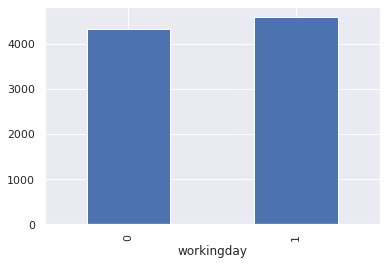

In [ ]:
df.groupby('workingday').cnt.mean().plot(kind='bar')

### Relationship between working/non day and registered/casual users

We can see that registered users more likely rent bike on working day and casual users more likely rent bike on non-working day.

In [ ]:
perc_registered = (df.registered.sum() / df.cnt.sum()) * 100
perc_casual = (df.casual.sum() / df.cnt.sum()) * 100

print("Registered users: %i (%.1f%%)"%(df.registered.sum(), perc_registered))
print("Casual users: %i (%.1f%%)"%(df.casual.sum(), perc_casual))
print("Total: %i"%(df.registered.sum() + df.casual.sum()))

Registered users: 2670893 (81.2%)
Casual users: 619952 (18.8%)
Total: 3290845


In [ ]:
df[['workingday', 'casual', 'registered']].groupby('workingday').sum()

,casual,registered
workingday,,
0,316732,683537
1,303220,1987356


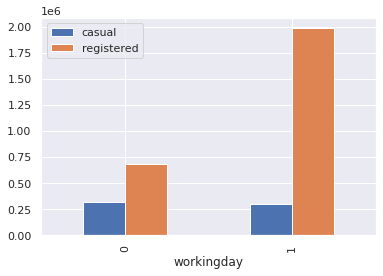

In [ ]:
df[['workingday', 'casual', 'registered']].groupby('workingday').sum().plot(kind='bar')